# Importing Modules

In [52]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, auc, confusion_matrix
from sklearn.datasets import make_classification
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Collecting Data

In [53]:
import os

train_path = r'E:/NSUT/6th Sem/Operating System/os_project/dataset/Training/'
test_path = r'E:/NSUT/6th Sem/Operating System/os_project/dataset/Testing/'

path = os.listdir(train_path)
classes = {'no_tumor':0, 'pituitary_tumor':1, 'glioma_tumor':2,'meningioma_tumor':3}

# Resizing Data

In [54]:
import cv2
X = []
Y = []
for cls in classes:
    pth = train_path+cls
    for j in os.listdir(pth):
        img = cv2.imread(pth+'/'+j, 0)
        img = cv2.resize(img, (200,200))
        X.append(img)
        Y.append(classes[cls])

# Converting Data into numeric form

In [55]:
X = np.array(X)
Y = np.array(Y)

In [56]:
# Checking what are the sub arrays in our software. i,e. 0 - No Tumor , 1 - Tumor, 2 - Glioma Tumor or 3 Meningioma Tumor
np.unique(Y)

array([0, 1, 2, 3])

In [57]:
# Checking total number of sampeles in data set which are having Tumor, No Tumor, Glioma Tumor and Meningioma Tumor
pd.Series(Y).value_counts()

1    827
2    826
3    822
0    395
dtype: int64

In [58]:
# Checking shape - this tells us Total number of samples and dimension of samples
X.shape

(2870, 200, 200)

# Visualising Sample Data

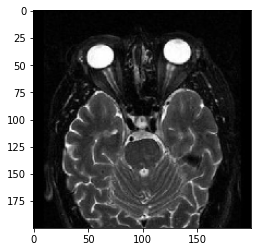

In [59]:
plt.imshow(X[1], cmap='gray')

# Preparing Data

In [60]:
# SK Learn works on 2 Dimensional data. But we had 3 Dimensional data above.
# So by reshaping it into 2 dimensional data we can continue
X_updated = X.reshape(len(X), -1)
X_updated.shape

(2870, 40000)

# Using test train split

In [61]:
xtrain, xtest, ytrain, ytest = train_test_split(X_updated, Y, random_state=10,
                                               test_size=.20)

In [62]:
# 977 sampels for Training the Data
# 245 samples for Testing the Data
xtrain.shape, xtest.shape

((2296, 40000), (574, 40000))

# Feature Scaling

In [63]:
# We could have also used standard scaler and min max scaler
# But we used Feature scaler because the RGB value of an image ranges from 0-255
# So we devided the samples by 255
# That is why we are getting all outcomes in 0 or 1
print(xtrain.max(), xtrain.min())
print(xtest.max(), xtest.min())
xtrain = xtrain/255
xtest = xtest/255
print(xtrain.max(), xtrain.min())
print(xtest.max(), xtest.min())

255 0
255 0
1.0 0.0
1.0 0.0


In [64]:
# Principle Component Analisys (Data reduction algo.)
# reduce number of atributes without significant loss in info.

print(xtrain.shape, xtest.shape)

pca = PCA(.98)
# pca_train = pca.fit_transform(xtrain)
# pca_test = pca.transform(xtest)
pca_train = xtrain
pca_test = xtest

(2296, 40000) (574, 40000)


# Logistic Regression

In [65]:
# Training Model
# high C means "Trust this training data a lot", while a low value says 
#"This data may not be fully representative of the real world data, so if it's telling 
#you to make a parameter really large, don't listen to it"
import warnings
warnings.filterwarnings('ignore')
lg = LogisticRegression(C=0.1)
lg.fit(pca_train, ytrain)

LogisticRegression(C=0.1)

# SVM

In [66]:
sv = SVC()
sv.fit(pca_train, ytrain)

SVC()

# Random Forest 

In [67]:
rf = RandomForestClassifier(n_estimators=100, random_state=10)
rf.fit(pca_train, ytrain)

RandomForestClassifier(random_state=10)

# KNN

In [68]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(pca_train, ytrain)

KNeighborsClassifier()

# Ridge Classifier

In [76]:
from sklearn.linear_model import RidgeClassifier

ridge_clf = RidgeClassifier(alpha=1.0, normalize=True)
ridge_clf.fit(pca_train, ytrain)

RidgeClassifier(normalize=True)

# Naive Bayes

In [77]:
# Importing Gaussian Naive Bayes
from sklearn.naive_bayes import GaussianNB

# Creating the Naive Bayes object
nb = GaussianNB()

# Training the Naive Bayes model on the PCA transformed training data
nb.fit(pca_train, ytrain)

# Making predictions 
nb_pred = nb.predict(pca_test)

# Convolution Neural Network

In [79]:
# Load the dataset using ImageDataGenerator
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_path,
    target_size=(200, 200),
    batch_size=32,
    class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
    test_path,
    target_size=(200, 200),
    batch_size=32,
    class_mode='categorical')

# Create the architecture of the CNN model
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(200, 200, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(4, activation='softmax'))

# Compile the model
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# Train the model
history = model.fit_generator(
    train_generator,
    steps_per_epoch=50,
    epochs=10,
    validation_data=validation_generator,
    validation_steps=50)

Found 2870 images belonging to 4 classes.
Found 394 images belonging to 4 classes.
Epoch 1/10
50/50 [==============================] - 118s 2s/step - loss: 1.2303 - accuracy: 0.4956 - val_loss: 1.7909 - val_accuracy: 0.2843
Epoch 2/10
50/50 [==============================] - 62s 1s/step - loss: 0.8407 - accuracy: 0.6431
Epoch 3/10
50/50 [==============================] - 64s 1s/step - loss: 0.6683 - accuracy: 0.7157
Epoch 4/10
50/50 [==============================] - 61s 1s/step - loss: 0.5611 - accuracy: 0.7591
Epoch 5/10
50/50 [==============================] - 61s 1s/step - loss: 0.4682 - accuracy: 0.7969
Epoch 6/10
50/50 [==============================] - 65s 1s/step - loss: 0.4118 - accuracy: 0.8352
Epoch 7/10
50/50 [==============================] - 60s 1s/step - loss: 0.3626 - accuracy: 0.8522
Epoch 8/10
50/50 [==============================] - 54s 1s/step - loss: 0.2690 - accuracy: 0.8868
Epoch 9/10
50/50 [==============================] - 56s 1s/step - loss: 0.2612 - accuracy:

# Decision Tree

In [81]:
from sklearn.tree import DecisionTreeClassifier

# Create a Decision Tree classifier with max_depth = 5
dtc = DecisionTreeClassifier(max_depth=5)

# Train the model
dtc.fit(xtrain,ytrain)

DecisionTreeClassifier(max_depth=5)

# Evaluation Logistic Regression

In [82]:
y_pred = lg.predict(pca_test)
print(classification_report(ytest, y_pred))
lg_train_score = lg.score(pca_train, ytrain)
lg_test_score = lg.score(pca_test, ytest)
print("Training Score: ", lg_train_score)
print("Testing Score: ",lg_test_score)

              precision    recall  f1-score   support

           0       0.78      0.69      0.73        91
           1       0.87      0.94      0.91       162
           2       0.68      0.78      0.73       145
           3       0.70      0.61      0.65       176

    accuracy                           0.76       574
   macro avg       0.76      0.76      0.76       574
weighted avg       0.76      0.76      0.76       574

Training Score:  1.0
Testing Score:  0.759581881533101


# Evaluation SVM

In [83]:
y_pred = sv.predict(pca_test)
print(classification_report(ytest, y_pred))
sv_train_score = sv.score(pca_train, ytrain)
sv_test_score = sv.score(pca_test, ytest)
print("Training Score: ", sv_train_score)
print("Testing Score: ", sv_test_score)

              precision    recall  f1-score   support

           0       0.79      0.76      0.78        91
           1       0.86      0.98      0.92       162
           2       0.78      0.83      0.81       145
           3       0.81      0.69      0.75       176

    accuracy                           0.82       574
   macro avg       0.81      0.81      0.81       574
weighted avg       0.82      0.82      0.81       574

Training Score:  0.9390243902439024
Testing Score:  0.8170731707317073


# Evaluation Random Forest

In [84]:
y_pred = rf.predict(pca_test)
print(classification_report(ytest, y_pred))
rf_train_score = rf.score(pca_train, ytrain)
rf_test_score = rf.score(pca_test, ytest)
print("Training Score: ",rf_train_score )
print("Testing Score: ",rf_test_score  )

              precision    recall  f1-score   support

           0       0.81      0.91      0.86        91
           1       0.90      0.98      0.94       162
           2       0.98      0.85      0.91       145
           3       0.85      0.83      0.84       176

    accuracy                           0.89       574
   macro avg       0.89      0.89      0.89       574
weighted avg       0.89      0.89      0.89       574

Training Score:  1.0
Testing Score:  0.8902439024390244


# Evaluation KNN

In [85]:
y_pred = knn.predict(pca_test)
print(classification_report(ytest, y_pred))
knn_train_score = knn.score(pca_train, ytrain)
knn_test_score = knn.score(pca_test, ytest)
print("Training Score:", knn_train_score)
print("Testing Score:", knn_test_score )

              precision    recall  f1-score   support

           0       0.71      0.74      0.72        91
           1       0.83      0.98      0.90       162
           2       0.71      0.93      0.81       145
           3       0.88      0.50      0.64       176

    accuracy                           0.78       574
   macro avg       0.78      0.79      0.77       574
weighted avg       0.80      0.78      0.77       574

Training Score: 0.8732578397212544
Testing Score: 0.7804878048780488


# Evaluation Ridge Classifier

In [86]:
# Evaluate the model on the test data
y_pred = ridge_clf.predict(pca_test)
print(classification_report(ytest, y_pred))
ridge_clf_train_score = ridge_clf.score(pca_train, ytrain)
ridge_clf_test_score = ridge_clf.score(pca_test, ytest)
print("Training Score: {:.2f}".format(ridge_clf_train_score))
print("Testing Score: {:.2f}".format(ridge_clf_test_score))

              precision    recall  f1-score   support

           0       0.83      0.64      0.72        91
           1       0.88      0.99      0.93       162
           2       0.71      0.86      0.78       145
           3       0.80      0.66      0.72       176

    accuracy                           0.80       574
   macro avg       0.80      0.79      0.79       574
weighted avg       0.80      0.80      0.80       574

Training Score: 1.00
Testing Score: 0.80


# Evaluation Naive Bayes

In [87]:
y_pred = nb.predict(pca_test)
print(classification_report(ytest, y_pred))

nb_train_score = nb.score(pca_train, ytrain)
nb_test_score = nb.score(pca_test, ytest)
print("Training Score: {:.2f}".format(nb_train_score))
print("Testing Score: {:.2f}".format(nb_test_score))

              precision    recall  f1-score   support

           0       0.62      0.59      0.61        91
           1       0.76      0.78      0.77       162
           2       0.48      0.90      0.63       145
           3       0.40      0.11      0.17       176

    accuracy                           0.58       574
   macro avg       0.57      0.60      0.54       574
weighted avg       0.56      0.58      0.52       574

Training Score: 0.62
Testing Score: 0.58


# Evaluation CNN

In [88]:
score = model.evaluate_generator(validation_generator, steps=50)

cnn_train_score = history.history["accuracy"][0]   
cnn_test_score = score[1]

print("cnn_train_score: ", cnn_train_score)
print("cnn_test_score: ", cnn_test_score)

cnn_train_score:  0.4955974817276001
cnn_test_score:  0.6675127148628235


# Evaluation Decision Tree

In [89]:
# Evaluate the model
y_pred = dtc.predict(pca_test)
print(classification_report(ytest, y_pred))
dt_train_score = dtc.score(pca_train, ytrain)
dt_test_score = dtc.score(pca_test, ytest)
print("Training Score: {:.2f}".format(dt_train_score))
print("Testing Score: {:.2f}".format(dt_test_score))

              precision    recall  f1-score   support

           0       0.76      0.64      0.69        91
           1       0.77      0.88      0.82       162
           2       0.91      0.68      0.77       145
           3       0.66      0.77      0.71       176

    accuracy                           0.75       574
   macro avg       0.77      0.74      0.75       574
weighted avg       0.77      0.75      0.75       574

Training Score: 0.83
Testing Score: 0.75


# Deducing the best classifier

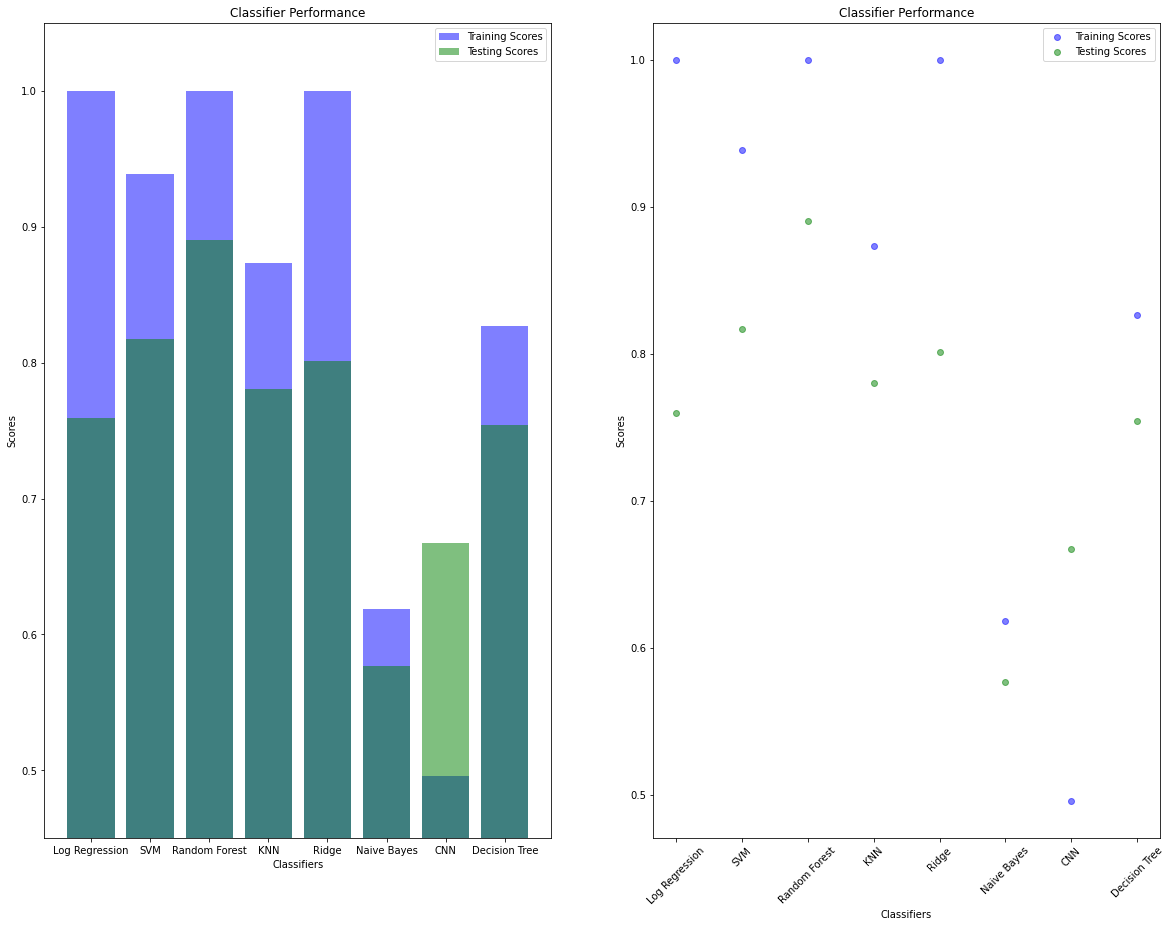

In [104]:
classifiers = ['Log Regression', 'SVM', 'Random Forest', 'KNN', 'Ridge', 'Naive Bayes', 'CNN', 'Decision Tree']
training_scores = [lg_train_score, sv_train_score, rf_train_score, knn_train_score, ridge_clf_train_score, nb_train_score, cnn_train_score, dt_train_score]
testing_scores =  [lg_test_score, sv_test_score, rf_test_score, knn_test_score, ridge_clf_test_score, nb_test_score, cnn_test_score, dt_test_score]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 15))

x_pos = [i for i, _ in enumerate(classifiers)]
ax1.bar(x_pos, training_scores, color='blue', alpha=0.5, label='Training Scores')
ax1.bar(x_pos, testing_scores, color='green', alpha=0.5, label='Testing Scores')
ax1.set_xlabel('Classifiers')
ax1.set_ylabel('Scores')
ax1.set_ylim(0.45,1.05)
ax1.set_title('Classifier Performance')
ax1.set_xticks(x_pos)
ax1.set_xticklabels(classifiers)
ax1.legend()

ax2.scatter(classifiers, training_scores, color='blue', alpha=0.5, label='Training Scores')
ax2.scatter(classifiers, testing_scores, color='green', alpha=0.5, label='Testing Scores')
ax2.set_xlabel('Classifiers')
ax2.set_ylabel('Scores')
ax2.set_title('Classifier Performance')
ax2.tick_params(axis='x', rotation=45)
ax2.legend()

plt.show()


In [105]:
max_metric = max(zip(training_scores,testing_scores), key=lambda pair: max(pair))
max_index = max_metric.index(max(max_metric))

print("The metric with the maximum value is:", classifiers[max_index])

The metric with the maximum value is: Log Regression


- Hence, we can see that **Logistic Regression** works with greater accuracy than rest here.

# Prediction

In [107]:
pred = lg.predict(pca_test)
np.where(ytest!=pred)

(array([  1,   4,   8,   9,  14,  19,  21,  25,  32,  35,  40,  44,  48,
         51,  59,  60,  75,  76,  78,  86,  97,  99, 101, 112, 117, 118,
        120, 122, 125, 126, 128, 135, 138, 140, 142, 143, 146, 150, 152,
        159, 163, 164, 165, 171, 174, 177, 181, 182, 183, 184, 187, 200,
        202, 203, 214, 216, 217, 218, 224, 230, 233, 234, 242, 243, 254,
        255, 256, 269, 270, 275, 286, 287, 289, 299, 300, 303, 305, 306,
        317, 322, 324, 326, 329, 335, 337, 338, 342, 359, 369, 370, 372,
        374, 380, 382, 384, 394, 396, 401, 409, 419, 420, 423, 425, 433,
        438, 441, 445, 448, 449, 450, 451, 453, 454, 456, 459, 468, 470,
        471, 482, 493, 501, 505, 512, 513, 517, 520, 522, 525, 530, 535,
        537, 543, 555, 556, 558, 560, 564, 571], dtype=int64),)

# Testing Model

In [108]:
dec = {0:'No Tumor', 1:'Pituitary Tumor', 2:'Glioma Tumor', 3:'Meningioma Tumor'}#Classes
classes_keys = list(classes.keys())

In [109]:
def pred_func(x):
    plt.figure(figsize=(12,8))
    p = os.listdir(test_path)
    c=1
    for i in os.listdir(test_path + f'/{x}')[:4]:
        plt.subplot(2,2,c)

        img = cv2.imread(test_path + f'/{x}/'+i,0)
        if img is None:
            print('Wrong path:', path)
        else:
            img1 = cv2.resize(img, (200,200))
            img1 = img1.reshape(1,-1)/255
            p = rf.predict(img1)
            plt.title(dec[p[0]])
            plt.imshow(img, cmap='gray')
            plt.axis('off')
            c+=1

- On No tumor test dataset

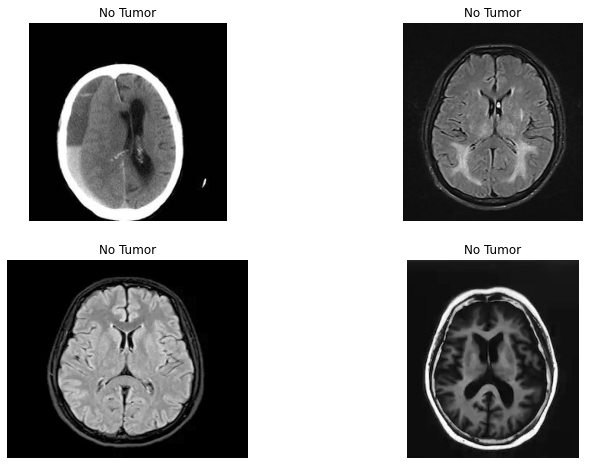

In [110]:
pred_func(classes_keys[0])

- On Pituitary Tumor test dataset

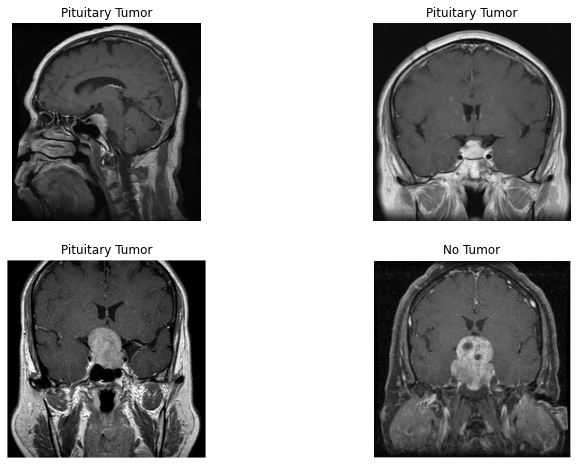

In [111]:
pred_func(classes_keys[1])

- On Glioma Tumor test dataset

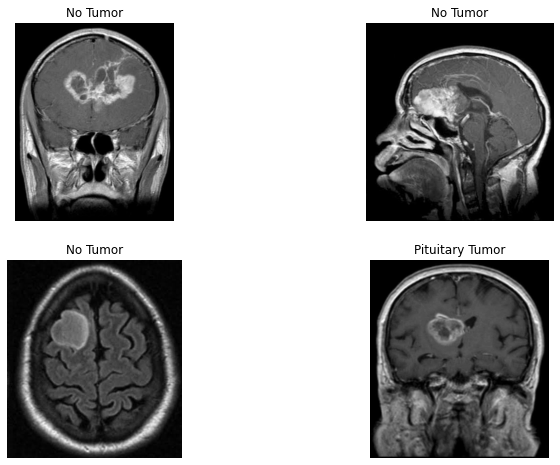

In [112]:
pred_func(classes_keys[2]) #Wrong predictions here

- On Meningioma Tumor test dataset

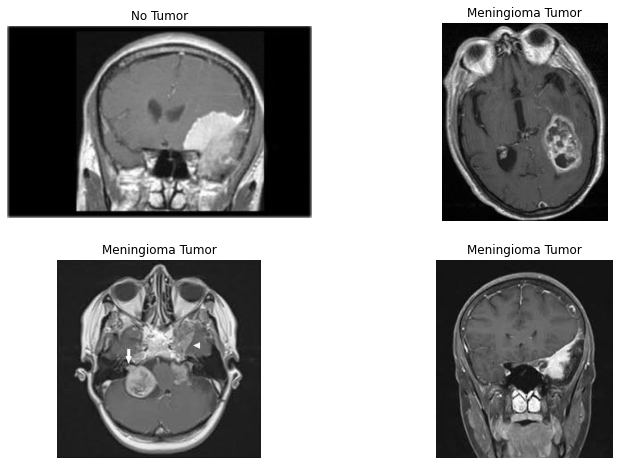

In [113]:
pred_func(classes_keys[3])